In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [32]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [33]:
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

In [34]:
data.duplicated().sum().sum()

np.int64(0)

In [35]:
data.set_index('ID',inplace=True)

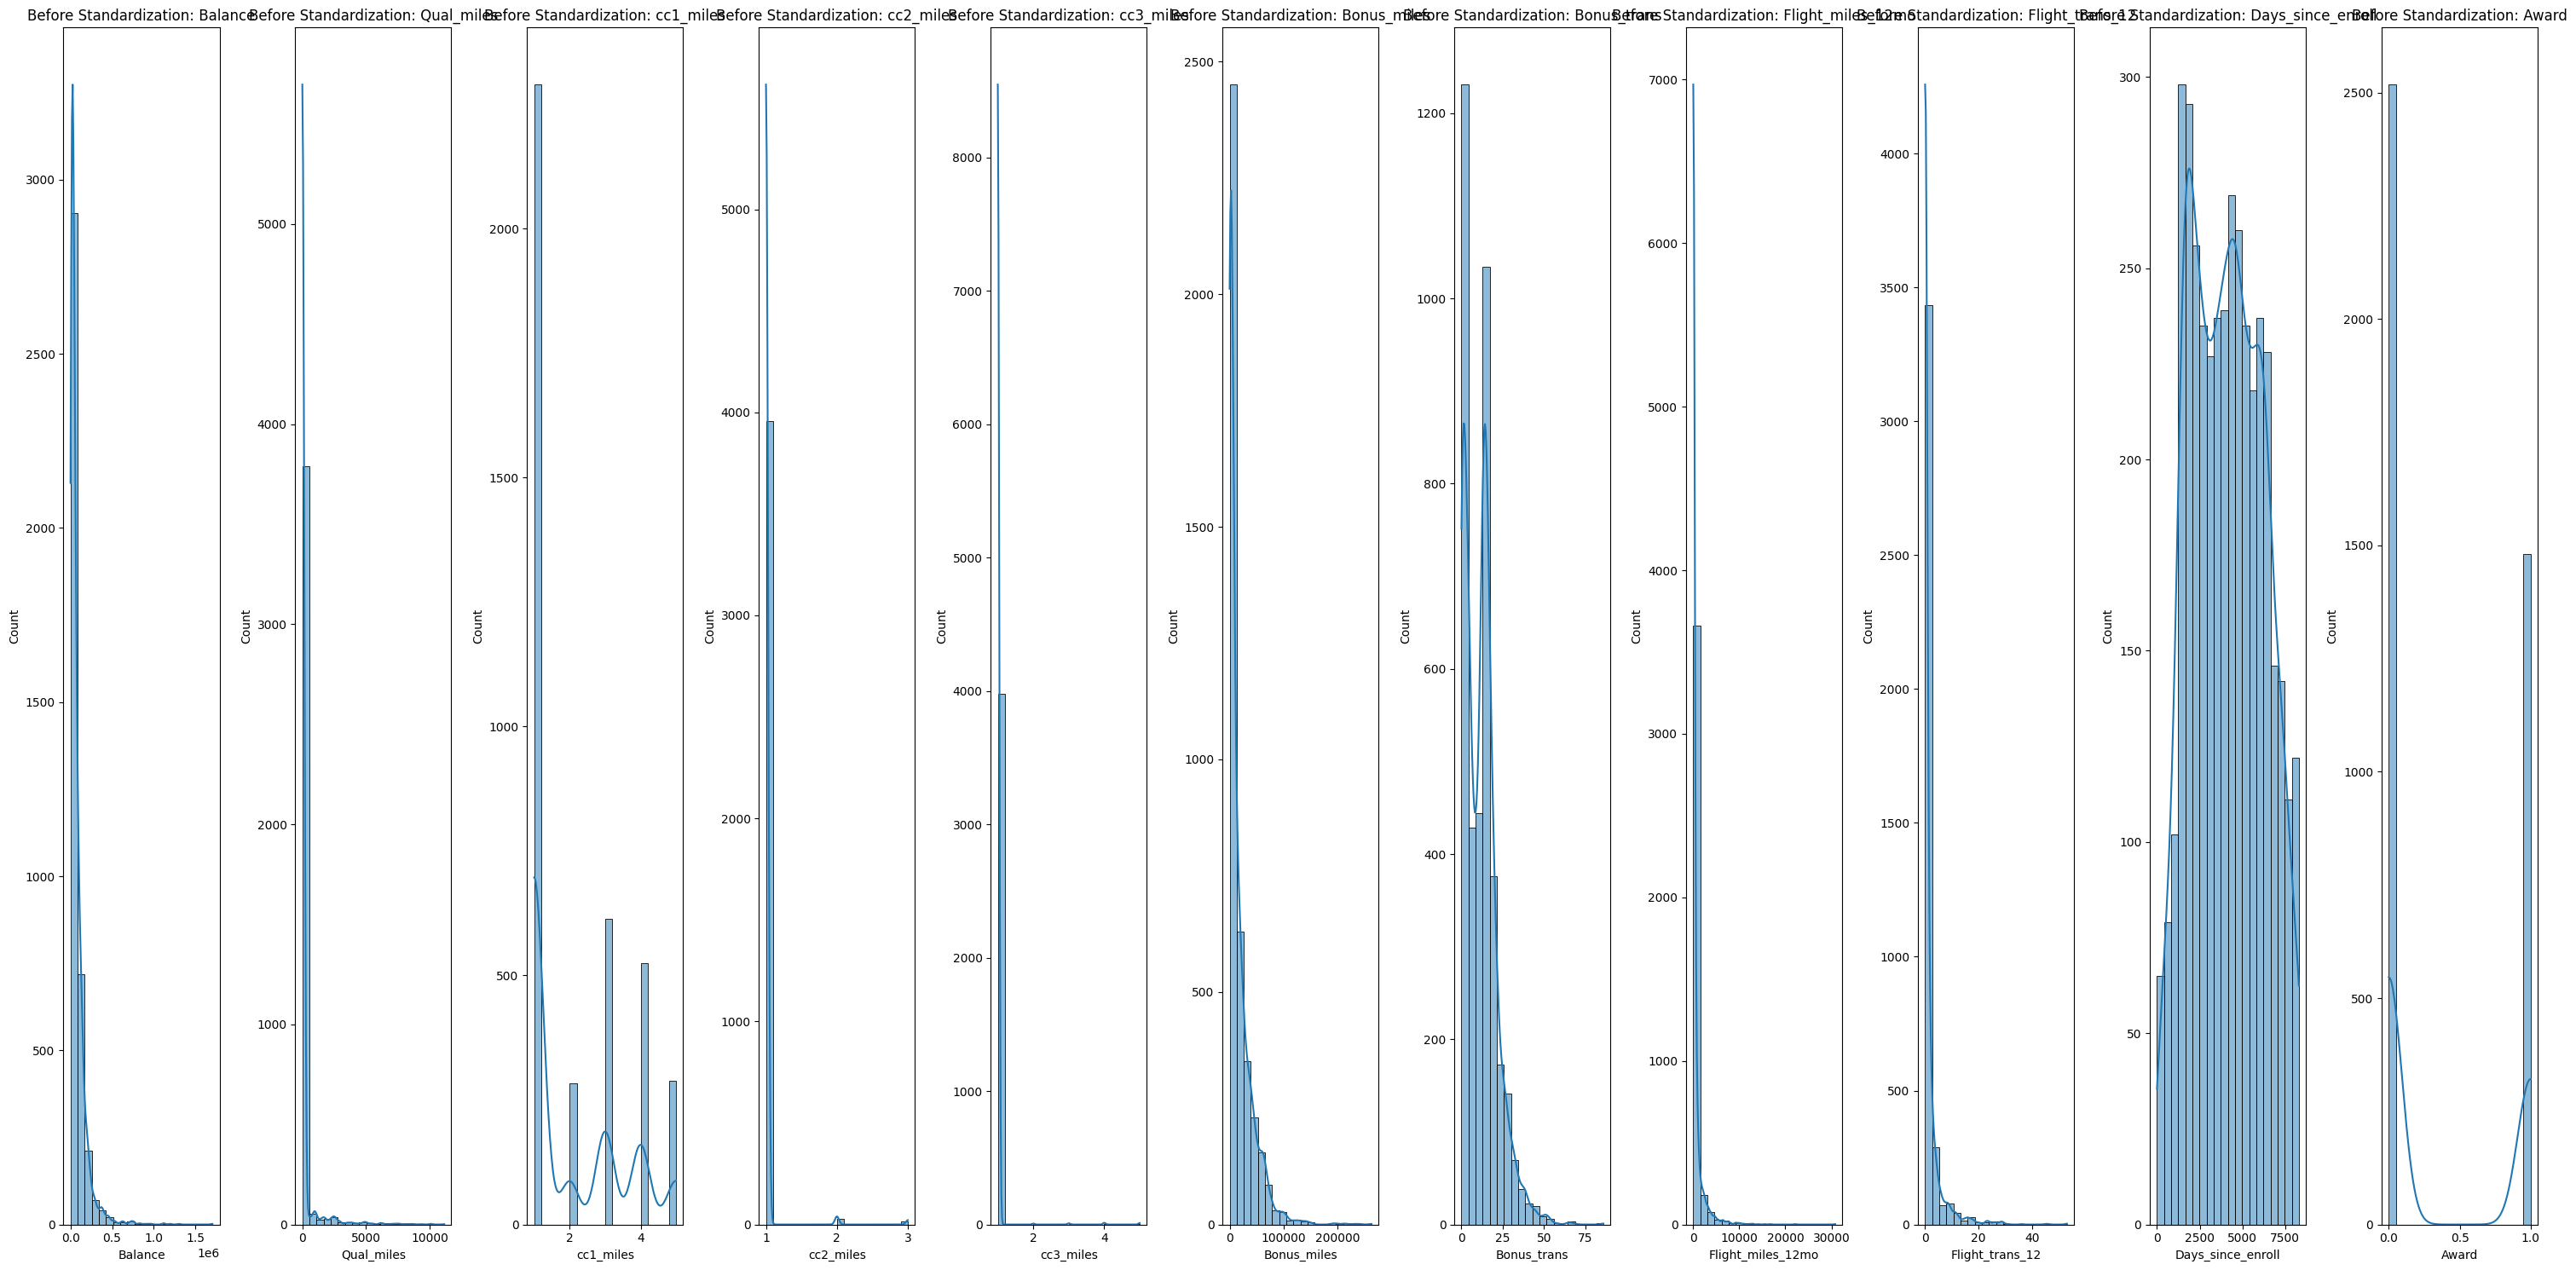

In [36]:
plt.figure(figsize=(30, 15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(1, len(data.columns), i)
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f'Before Standardization: {column}')
plt.tight_layout()
plt.show()

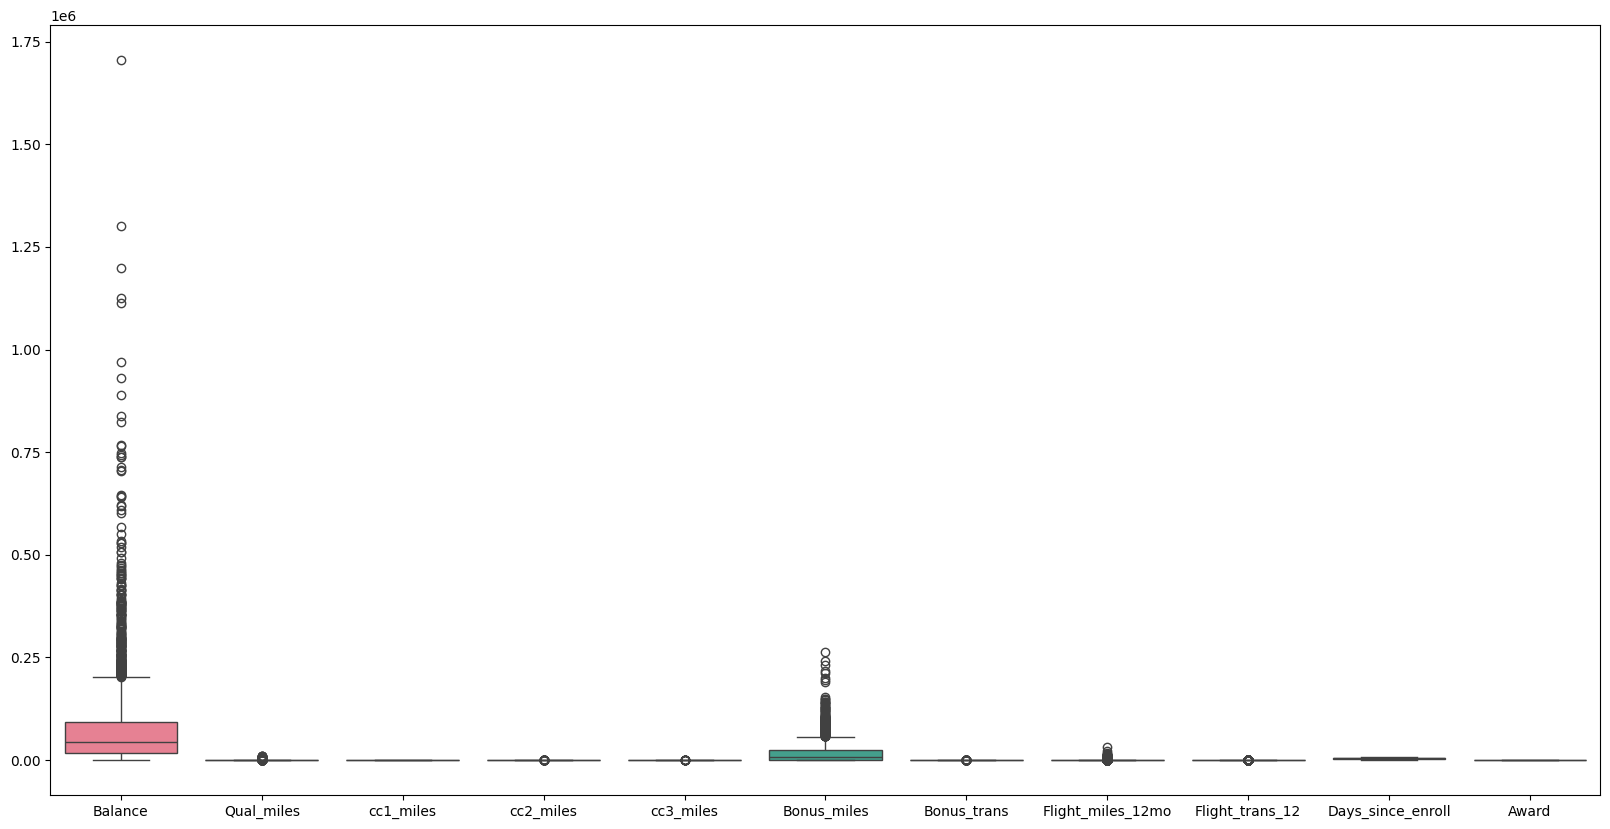

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.show()

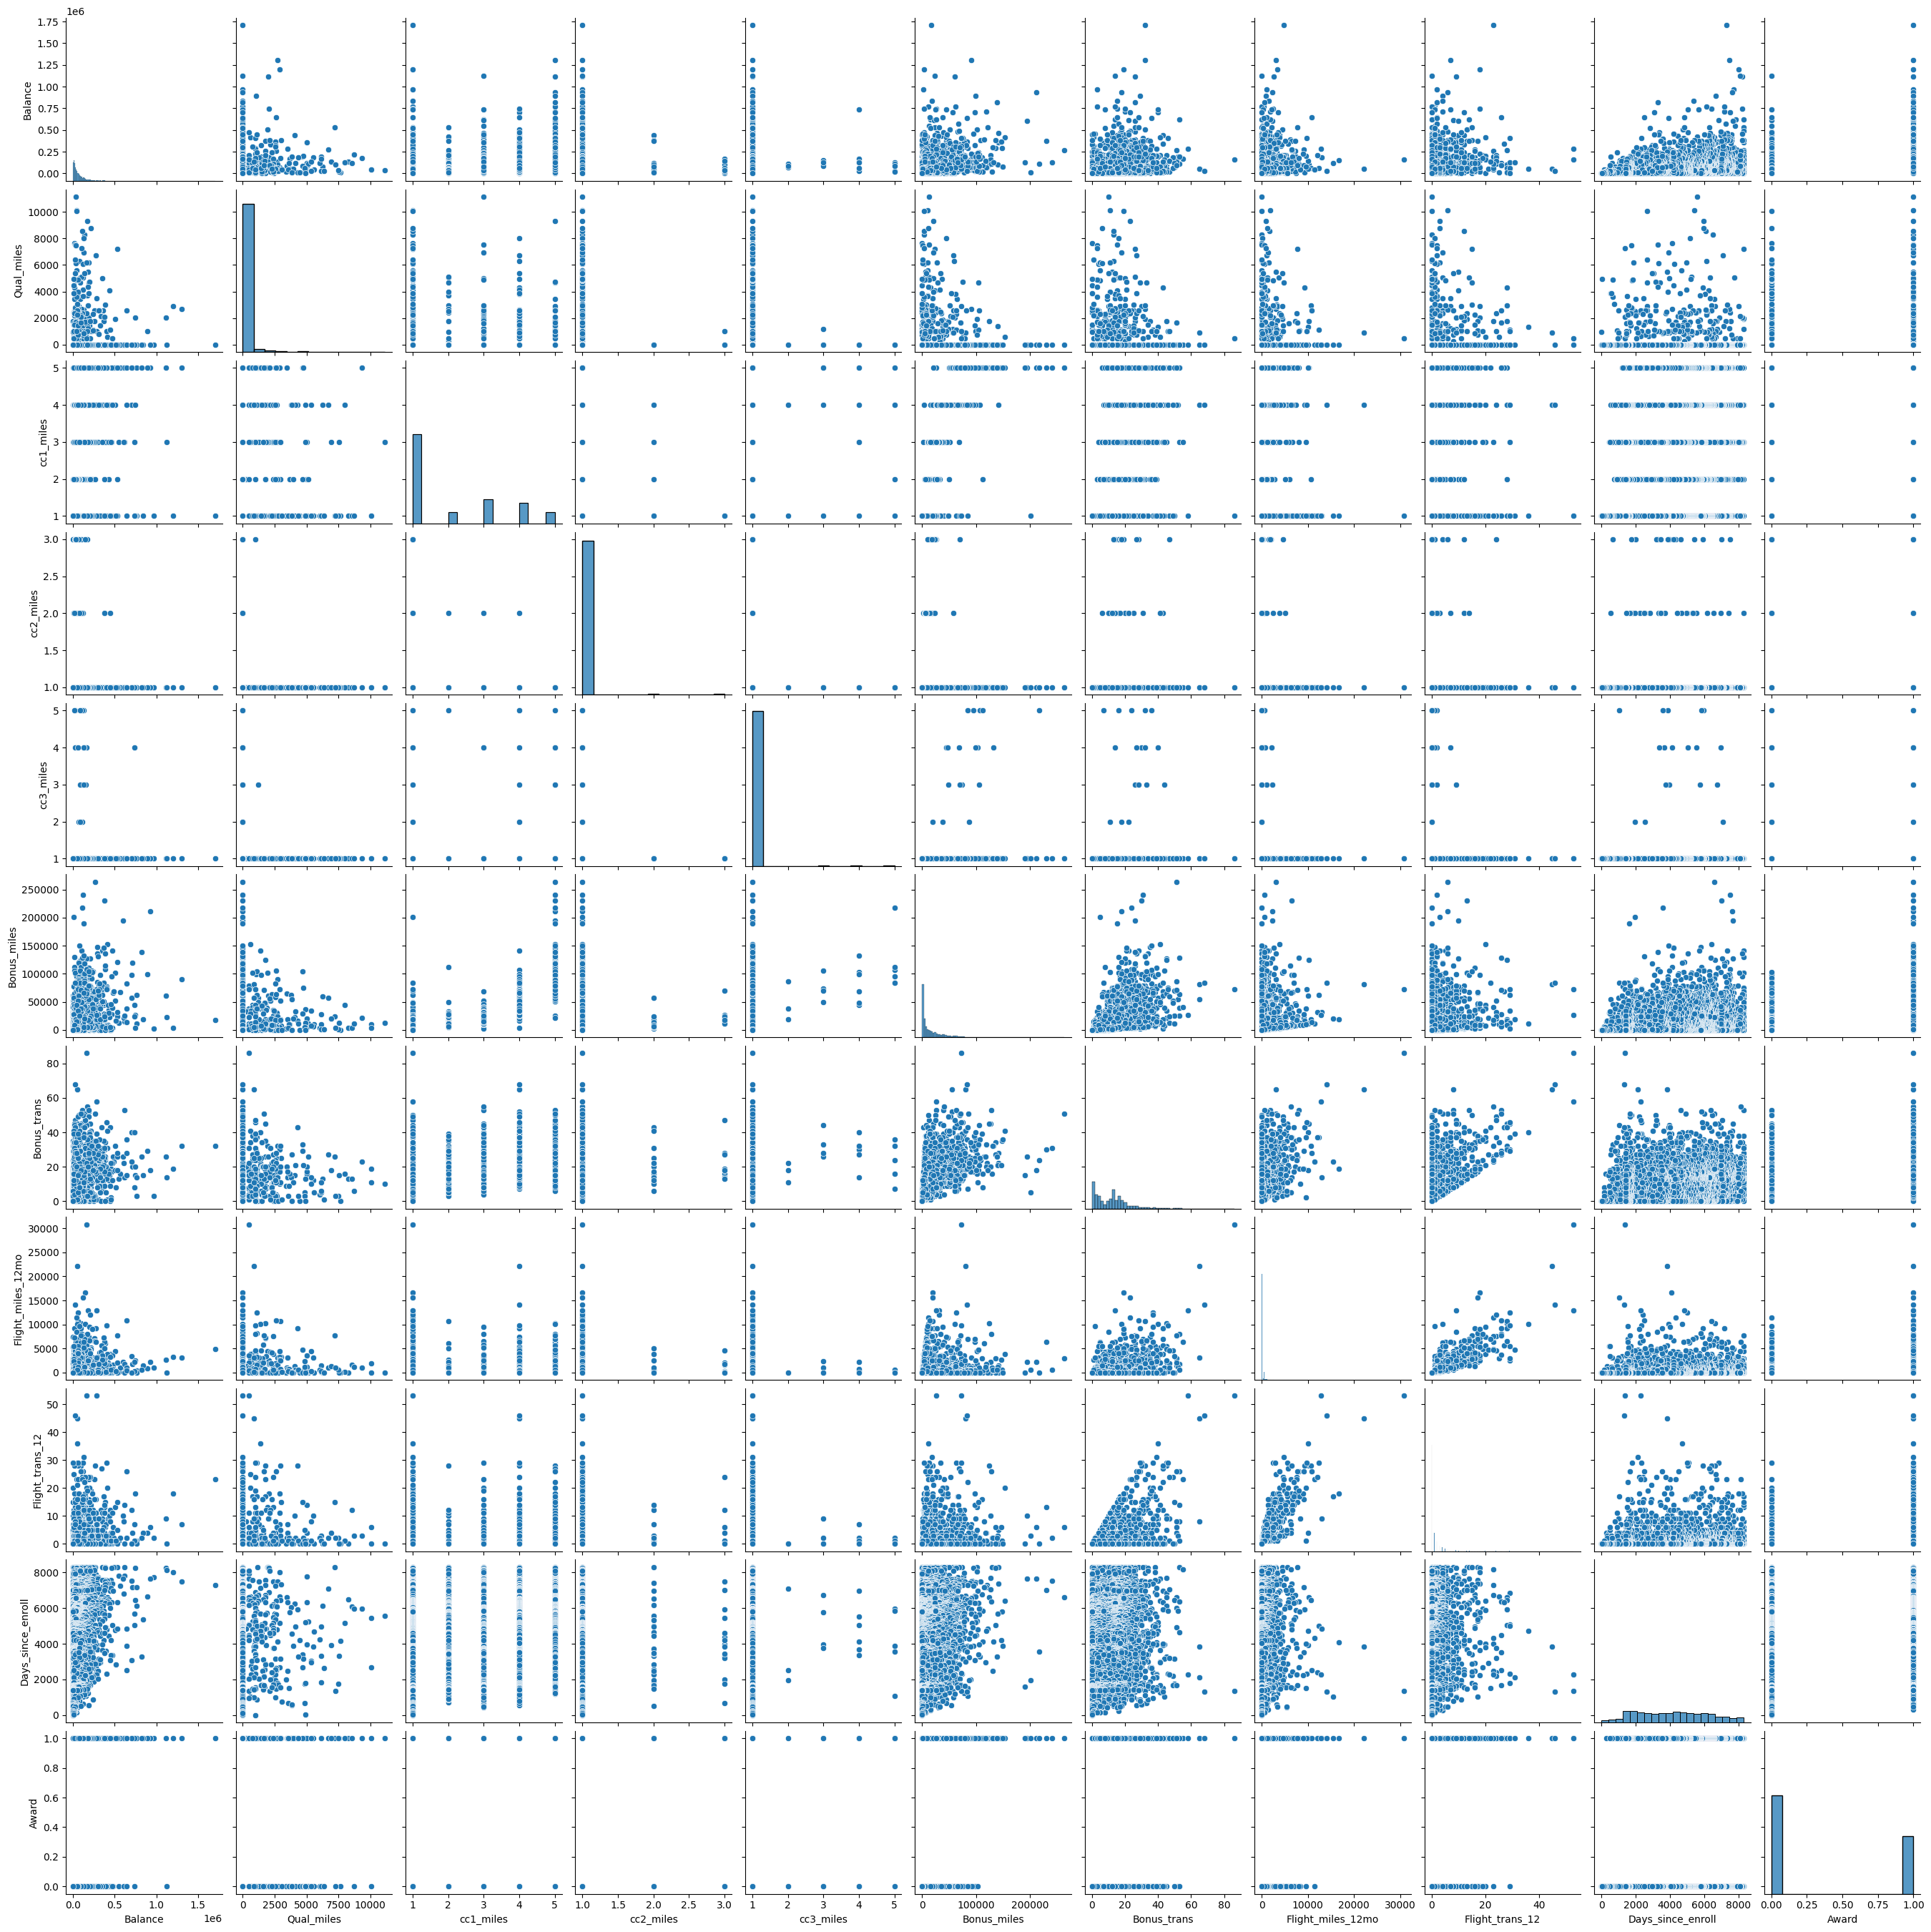

In [38]:
sns.pairplot(data=data)

In [39]:
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


# Implementing clustering Algorithms

In [40]:
from sklearn.cluster import KMeans

In [41]:
model = KMeans(n_clusters=5).fit(data)

<Axes: xlabel='Balance', ylabel='Qual_miles'>

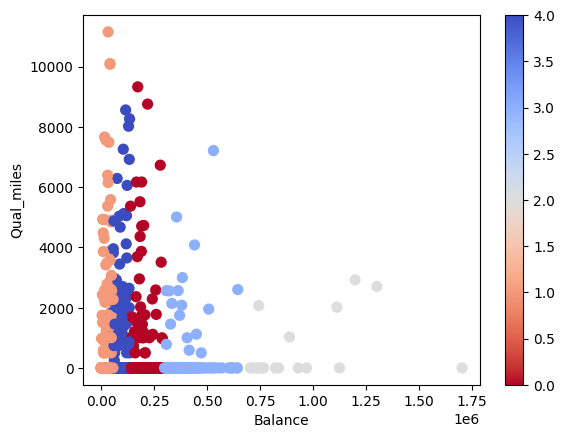

In [42]:
data.plot(x="Balance", y="Qual_miles", c=model.labels_, kind="scatter", s=50, cmap=plt.cm.coolwarm_r)


In [43]:
def norm(i):
  x = (i-i.min())/(i.max()-i.min())
  return(x)

In [44]:
norm_data=norm(data)
norm_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0


In [45]:
norm_data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


In [46]:
WCSS= []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i).fit(norm_data)
  WCSS.append(kmeans.inertia_)
WCSS

[1830.7932128584107,
 823.6756984125209,
 625.1768205797015,
 436.7088576193257,
 348.94342839013245,
 320.55079078127983,
 352.54098802859335,
 275.8157833743602,
 249.57586726963103,
 241.80574636166628]

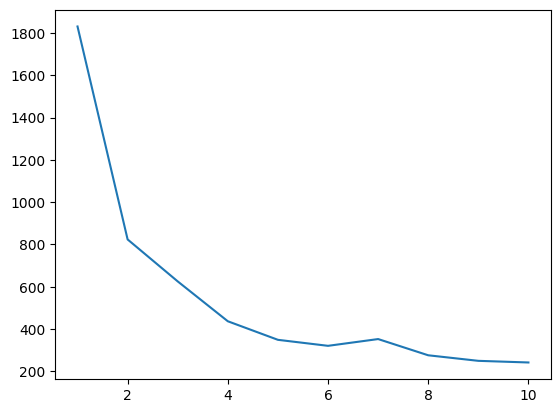

In [47]:
plt.plot(range(1,11),WCSS)


In [48]:
cl = KMeans(n_clusters=5)
cl.fit_predict(norm_data)
cl

KMeans(n_clusters=5)

In [49]:
cl.inertia_

348.943321725414

In [50]:
cl.cluster_centers_

array([[ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01,  3.44169138e-15],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.33066907e-16],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
  

In [51]:
model1=pd.DataFrame(cl.labels_,columns=['cluster'])
model1

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,2
3995,2
3996,1
3997,4


In [52]:
norm_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0


In [53]:
norm_data['cluster_id']=cl.labels_
norm_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
ID,,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1


In [54]:
cluster_id =norm_data.iloc[:,:].groupby(norm_data.cluster_id).mean()
cluster_id

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
cluster_id,,,,,,,,,,,,
0,0.029282,0.008065,0.030530,0.009793,0.000288,0.013149,0.080391,0.007912,0.013738,0.671079,0.0,0.0
1,0.063535,0.017791,0.728960,0.000619,0.006498,0.172970,0.234904,0.023160,0.040421,0.586139,1.0,1.0
2,0.048995,0.026054,0.039004,0.016345,0.002229,0.033564,0.121825,0.033427,0.059407,0.522892,1.0,2.0
3,0.069389,0.006590,0.646036,0.000809,0.005663,0.119022,0.200384,0.007272,0.011846,0.532620,0.0,3.0
4,0.019414,0.008444,0.017684,0.008236,0.001696,0.012305,0.071784,0.006907,0.011390,0.239981,0.0,4.0


<Axes: xlabel='cluster_id'>

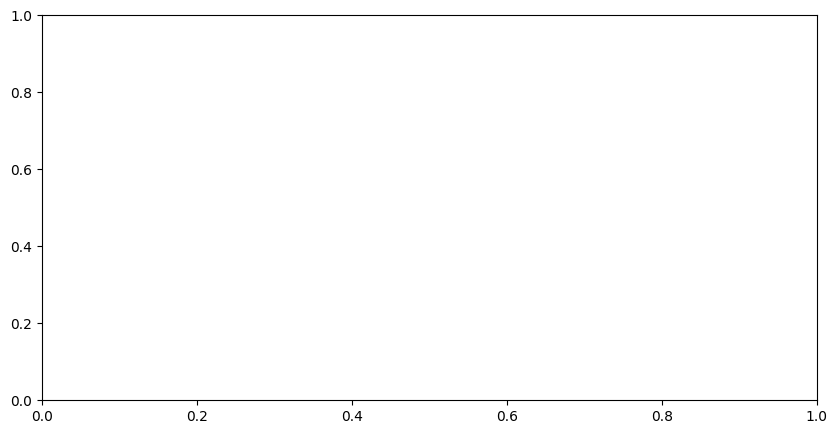

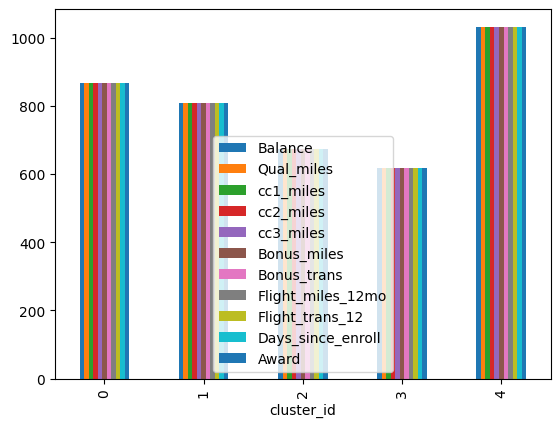

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
norm_data.groupby(['cluster_id']).count().plot(kind='bar')

In [59]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [58]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3999, 11)

In [60]:
minMax_scaler = MinMaxScaler()
minMax_data = minMax_scaler.fit_transform(data)
minMax_data.shape

(3999, 11)

In [64]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score as sil

In [62]:
norm_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
ID,,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [143.75, 143.75, 191.25, 191.25],
  [103.75, 103.75, 167.5, 167.5],
  [72.5, 72.5, 135.625, 135.625],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 342.5],
  [315.0, 315.0, 333.75, 333.75],
  [365.0, 365.0, 375.0, 375.0],
  [324.375, 324.375, 370.0, 370.0],
  [300.0, 300.0, 347.1875, 347.1875],
  [280

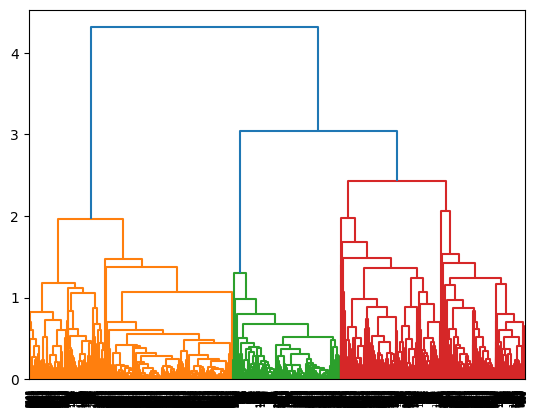

In [63]:
sch.dendrogram(sch.linkage(norm_data, method='complete'))

In [67]:
for n_clusters in range(2,11):
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(norm_data)
        silhouette_score1 = sil(norm_data, hie_labels1)
        print("For n_cluster ", n_clusters,"The average silhouette score with linkage ",linkages, ':',silhouette_score1)
    print()

For n_cluster  2 The average silhouette score with linkage  ward : 0.6138512624542446
For n_cluster  2 The average silhouette score with linkage  complete : 0.6138512624542446
For n_cluster  2 The average silhouette score with linkage  average : 0.6138512624542446
For n_cluster  2 The average silhouette score with linkage  single : 0.45584325918557717

For n_cluster  3 The average silhouette score with linkage  ward : 0.6566286392616756
For n_cluster  3 The average silhouette score with linkage  complete : 0.6566286392616756
For n_cluster  3 The average silhouette score with linkage  average : 0.6566286392616756
For n_cluster  3 The average silhouette score with linkage  single : 0.6566286392616756

For n_cluster  4 The average silhouette score with linkage  ward : 0.6712678267163393
For n_cluster  4 The average silhouette score with linkage  complete : 0.673264826198604
For n_cluster  4 The average silhouette score with linkage  average : 0.6228434288658068
For n_cluster  4 The averag

In [68]:
hierarichal = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='complete')
hierarichal

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [70]:
hierarichal2 = hierarichal.fit_predict(norm_data)
clusters=pd.DataFrame(hierarichal2,columns=['Clusters'])
clusters

,Clusters
0,5
1,5
2,5
3,5
4,1
...,...
3994,3
3995,3
3996,1
3997,0


In [71]:
clusters['Clusters'].value_counts()

Clusters
0    1650
5     868
1     802
3     670
2       7
4       2
Name: count, dtype: int64

In [72]:
norm_data['Clusters_id'] = hierarichal.labels_
norm_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id,Clusters_id
ID,,,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0,5
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0,5
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0,5
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0,5
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2,3
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2,3
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1,1


In [75]:
from sklearn.cluster import DBSCAN

In [73]:
array=data.values
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array)

In [76]:
dbScan = DBSCAN(eps=1.8, min_samples=10) 
dbScan.fit(x)

DBSCAN(eps=1.8, min_samples=10)

In [77]:
dbScan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [78]:
pd.Series(dbScan.labels_).unique()

array([ 0,  1, -1,  2])

In [81]:
c=pd.DataFrame(dbScan.labels_, columns=['cluster'])
c

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [82]:
pd.concat([data,c],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,1.0
5,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


<Axes: xlabel='Balance', ylabel='Bonus_trans'>

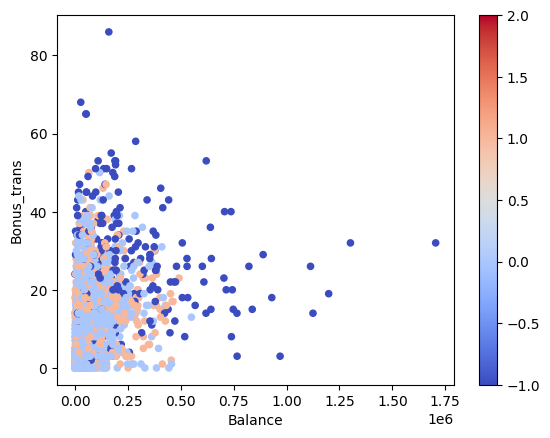

In [87]:
data.plot(x="Balance",y="Bonus_trans",c=dbScan.labels_,kind="scatter",colormap='coolwarm')

In [90]:
from sklearn.metrics import silhouette_score

In [89]:
clusterInertia = [] 
sScores = [] 

In [91]:
for n in range(2,11):
    KMEst = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusterInertia.append(KMEst.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KMEst.labels_)
    sScores.append(silhouette_avg)

<Axes: >

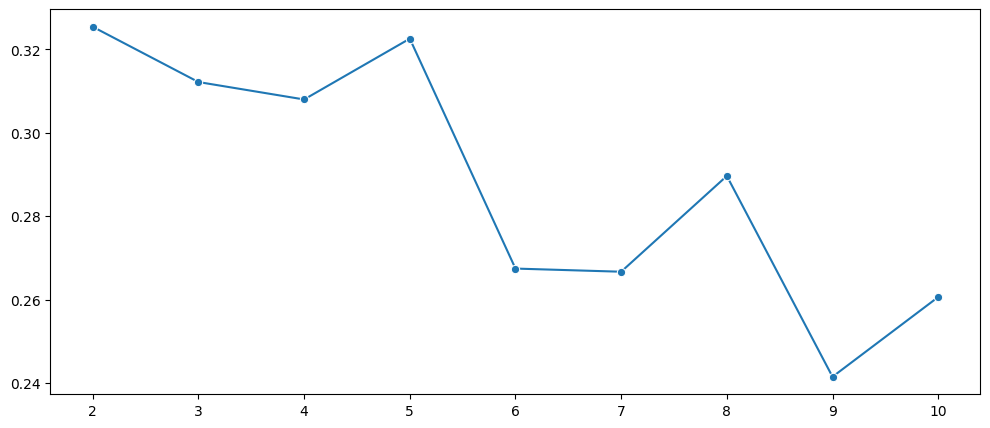

In [93]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=[2,3,4,5,6,7,8,9,10], y=sScores, marker='o', ax=ax)

In [95]:
KMEst

KMeans(n_clusters=10)

In [96]:
KMEst.labels_

array([5, 5, 5, ..., 8, 0, 0], dtype=int32)

In [97]:
import sklearn

In [98]:
sklearn.metrics.silhouette_score(std_df, KMEst.labels_)

np.float64(0.2606178050186951)

In [ ]:
sklearn.metrics.silhouette_score(x,dbScan.labels_)

np.float64(0.25259632017279593)

In [100]:
from sklearn.neighbors import NearestNeighbors

In [103]:
neighbours= NearestNeighbors(n_neighbors=12) #2n -> n=# of fetaure/column =6 ,2n=2*6=>12
nbrs=neighbours.fit(x)
distances,indices=nbrs.kneighbors(x)

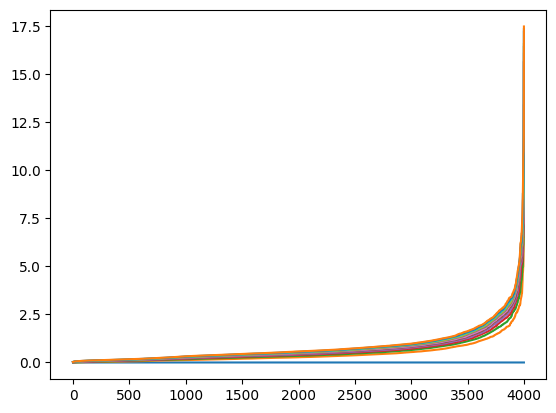

In [104]:
distance=np.sort(distances,axis=0)
distance=distance[:,]
plt.plot(distance)